In [34]:
import numpy as np
import pandas as pd
#from Evaluator import ModelEvaluator
from EvaluatorRF import ModelEvaluator
import torch
import random
import swifter
from matplotlib import pylab as plt
from IPython.display import clear_output
import copy

In [35]:
asproxOld = pd.read_csv('./datasets/output-TrojanAsproxOld.csv', header=0)
asproxNew = pd.read_csv('./datasets/output-TrojanAsproxNew.csv', header=0)
electroRAT = pd.read_csv('./datasets/output-AllElectroRAT.csv', header=0)

In [36]:
data=pd.concat([asproxOld,asproxNew,electroRAT],ignore_index=True)

In [37]:
print(data)

                               udps.n_bytes_per_packet
0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
1    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
2    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
3    [[46, 53, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 100...
4    [[1, 153, 213, 211, 0, 8, 0, 2, 24, 156, 0, 1,...
..                                                 ...
118  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
119  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
120  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
121  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
122  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...

[123 rows x 1 columns]


In [38]:
data['udps.n_bytes_per_packet'] = data['udps.n_bytes_per_packet'].swifter.apply(eval)
data = data.explode('udps.n_bytes_per_packet', ignore_index=True)

Pandas Apply:   0%|          | 0/123 [00:00<?, ?it/s]

In [39]:
print(data)

                               udps.n_bytes_per_packet
0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [71, 69, 84, 32, 47, 110, 99, 115, 105, 46, 11...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
..                                                 ...
586  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
587  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
588  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
589  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
590  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

[591 rows x 1 columns]


In [40]:
npdata=data.to_numpy()
malData=np.copy(npdata)
print(type(malData[1,:]))
print(malData[:1].shape)

<class 'numpy.ndarray'>
(1, 1)


In [41]:
data

,udps.n_bytes_per_packet
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[71, 69, 84, 32, 47, 110, 99, 115, 105, 46, 11..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...
586,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
587,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
588,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
589,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [42]:
type(data['udps.n_bytes_per_packet'][0])

list

In [43]:
testData = copy.copy(data)
testData = testData['udps.n_bytes_per_packet'].apply(lambda x: pd.Series(x))

# rename columns
testData = testData.rename(columns=lambda x: f'{x+1}')

In [11]:
testData

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,71,69,84,32,47,110,99,115,105,46,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
row_sums = testData.sum(axis=1)
print(row_sums)

# Find the rows where the sum of columns is not equal to 0
rows_to_keep = testData.loc[row_sums != 0]

rows_to_keep.reset_index(drop=True, inplace=True)

# Print the new DataFrame
print(rows_to_keep)

0         0
1         0
2         0
3      7891
4         0
       ... 
586       0
587       0
588       0
589       0
590       0
Length: 591, dtype: int64
      1   2    3    4   5    6    7    8    9   10  ...  1015  1016  1017  \
0    71  69   84   32  47  110   99  115  105   46  ...     0     0     0   
1    72  84   84   80  47   49   46   49   32   50  ...     0     0     0   
2    71  69   84   32  47  110   99  115  105   46  ...     0     0     0   
3    72  84   84   80  47   49   46   49   32   50  ...     0     0     0   
4    46  53    1    0   0    1    0    0    0    0  ...     0     0     0   
..   ..  ..  ...  ...  ..  ...  ...  ...  ...  ...  ...   ...   ...   ...   
161   1  29  177  112   0    8    0    2   24  156  ...     0     0     0   
162  71  69   84   32  47  110   99  115  105   46  ...     0     0     0   
163  72  84   84   80  47   49   46   49   32   50  ...     0     0     0   
164  80  79   83   84  32   47  104  102  118   50  ...     0     0     

In [44]:
#testMalData = np.copy(rows_to_keep.to_numpy())
testMalData = np.copy(testData.to_numpy())

In [45]:
testMalData.shape

(591, 1024)

In [46]:
malData

array([[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
malData.shape

(591, 1)

In [48]:
ogMalData = np.copy(malData)
malData = np.copy(testMalData)

In [18]:
#modEval = ModelEvaluator()
#modEval.test(malData[0:1])

#state = np.asarray(malData[random.randint(0, len(malData)-1)])
#print(state)
#print(state.shape)
#value = state.tolist()
#print(value)
#modEval.test(value)

## control

In [49]:
totalEpochs=1000
totalNumAdversarialData=500
saveValue=totalEpochs-totalNumAdversarialData
if saveValue<=0:
    saveValue=0
totalItemsConv=0

In [50]:
features=['A']
df=pd.DataFrame(columns=range(1024))
df_test=pd.DataFrame(columns=range(1024))

In [51]:
class MalwareEnv():
    def __init__(self,totalEpochs):
        # Actions we can take, decrease, increse
        self.action_space = 1024  
        # Set start 
        self.state = np.asarray(malData[random.randint(0, 100)])
        #model to evaluate the reward
        self.evaluator=ModelEvaluator()
        #units to move
        self.block=10
        #number of items saved
        self.savedItems=0
        self.savedTest=0
        #pointcritic
        self.pointCritic=totalEpochs-totalNumAdversarialData
        #loss
        self.hit=0
        
    def reset(self):
        self.state = np.asarray(malData[random.randint(0, 100)])
        
        
    def step(self, action):
        print(action)
        print(self.state)
        print(self.state.shape)
        if(action<1023):
            self.state[action]+=self.block
        elif(action>=1023):
            self.state[action-1024]-=self.block
            
        
    def reward(self):
        reward=-1
        value=self.state.tolist()
        result=self.evaluator.test(value)
        
        if(result==0):
            self.hit+=5 #Ajustable
            reward=+20 #Ajustable
            self.saveItem()
                 
        return reward    
    
    def saveItem(self):
        if self.hit>self.pointCritic:
            
            print("saved")
            
            formatier=self.state.reshape(1,-1)[0]
            df.loc[self.savedItems]=formatier
            self.savedItems+=1
            

    def render_np(self):
        return self.state

In [52]:
l1 = 1024
l2 = 2468
l3 = 5120
l4 = 3072
l5 = 2048
model = torch.nn.Sequential(
    torch.nn.Linear(l1, l2),
    torch.nn.ReLU(),
    torch.nn.Linear(l2, l3),
    torch.nn.ReLU(),
    torch.nn.Linear(l3,l4),
    torch.nn.ReLU(),
    torch.nn.Linear(l4,l5)
)
#device=torch.device("cuda:0" if torch.cuda.is_available else "cpu")
model.cuda()
loss_fn = torch.nn.MSELoss()
learning_rate = 1e-4 #Ajustable

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
gamma = 0.9
epsilon = 1.0

In [53]:
#from EvaluatorRF import ModelEvaluator

In [54]:
testEval = ModelEvaluator()
print(malData[0:1])
result = testEval.test(malData[0:1])
print(result)

[[0 0 0 ... 0 0 0]]
[0.]


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished


In [55]:
epochs = copy.copy(totalEpochs)
losses = [] 
env = MalwareEnv(totalEpochs)


for i in range(epochs): 
    env.reset()
    state_ = env.render_np().reshape(1,1024) + np.random.rand(1,1024)/50.0 
    state1 = torch.from_numpy(state_).float() 
    status = 1 
    while(status == 1): 
        qval = model(state1.cuda()) 
        qval_ = qval.data.cpu().numpy()
        if (random.random() < epsilon):
            action_ = np.random.randint(0,2048)
            #print("random:",action_)
        else:
            action_ = np.argmax(qval_)
            #print("qval:",action_)
        env.step(action_) 
        state2_ = env.render_np().reshape(1,1024) + np.random.rand(1,1024)/50.0
        state2 = torch.from_numpy(state2_).float() 
        reward = env.reward()
        with torch.no_grad():
            newQ = model(state2.reshape(1,1024).cuda())
        maxQ = torch.max(newQ) 
        if reward == -1: 
            Y = reward + (gamma * maxQ)
        else:
            Y = reward
        Y = torch.Tensor([Y]).detach()
        X = qval.squeeze()[action_] 
        loss = loss_fn(X.cuda(), Y.cuda()) 
        print(i, loss.item())
        clear_output(wait=True)
        optimizer.zero_grad()
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
        state1 = state2
        if reward != -1 or loss > 1e10 or loss <= 1.05: 
            status = 0
    if epsilon > 0.1: 
        epsilon -= (1/epochs)

854
[0 0 0 ... 0 0 0]
(1024,)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s


saved
999 397.8912048339844


[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished
d:\anaconda3\envs\black-box\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [56]:
losses
#clear_output(wait=True)

[25.740375518798828,
 1035.068359375,
 1964.133544921875,
 1750.111328125,
 1972.3026123046875,
 3070.070556640625,
 2538.677001953125,
 2618.954345703125,
 4102.06884765625,
 4549.95068359375,
 4026.975341796875,
 5739.56396484375,
 4403.30322265625,
 3807.840576171875,
 4868.52734375,
 6075.181640625,
 5417.71875,
 7179.40771484375,
 5074.89599609375,
 6955.1962890625,
 7717.607421875,
 8725.306640625,
 7729.443359375,
 6841.51708984375,
 8893.6748046875,
 7397.67333984375,
 6601.62939453125,
 6099.78271484375,
 5174.1083984375,
 6511.97607421875,
 8734.1640625,
 7641.0849609375,
 5887.02392578125,
 3567.812744140625,
 10049.3173828125,
 6691.56640625,
 9669.8408203125,
 8470.251953125,
 9482.5576171875,
 9903.3701171875,
 9479.61328125,
 12050.8642578125,
 8184.34619140625,
 13420.7822265625,
 12242.0234375,
 10496.7041015625,
 12400.16796875,
 9229.6220703125,
 9828.9033203125,
 7377.068359375,
 7242.69384765625,
 11569.283203125,
 8348.72265625,
 16206.5380859375,
 9053.2255859375

Text(0, 0.5, 'Loss')

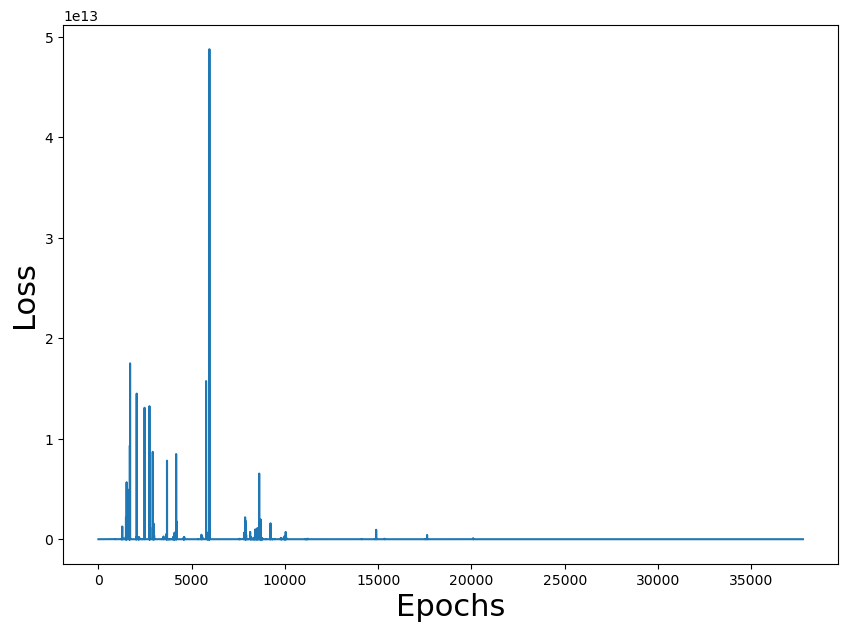

In [57]:
plt.figure(figsize=(10,7))
plt.plot(losses)
plt.xlabel("Epochs",fontsize=22)
plt.ylabel("Loss",fontsize=22)

In [58]:
df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326,0,0,0,0,0,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
#df_test

In [60]:
print(df.empty)

False


In [61]:
if(not df.empty):
    df.to_csv('datasets/Adversarial_data_RF_v20.csv' ,header=False,index=False)

In [62]:
#df_test.to_csv('datasets/Adversarial_data_test_v8.csv' ,header=False,index=False)

In [63]:
torch.save(model.state_dict(), 'DRL_MalwareMod_RF_v20.sav')